In [284]:
!pip install -U scikit-learn


# Program 9 RNN Model

In [285]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [286]:
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [287]:
# m=df["Date"]
# m[0]

In [288]:
df['Date'] = pd.to_datetime(df['Date'])

In [289]:
df = df.sort_values('Date')

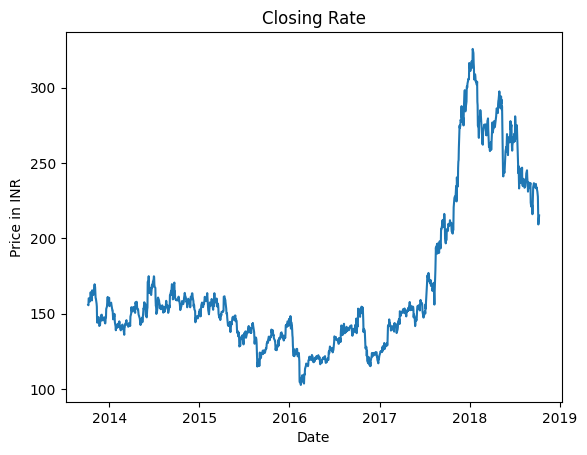

In [290]:
plt.plot(df['Date'],df['Close'])
plt.title("Closing Rate")
plt.ylabel("Price in INR")
plt.xlabel("Date")
plt.show()

Text(0.5, 1.0, 'Total Trade Quantity')

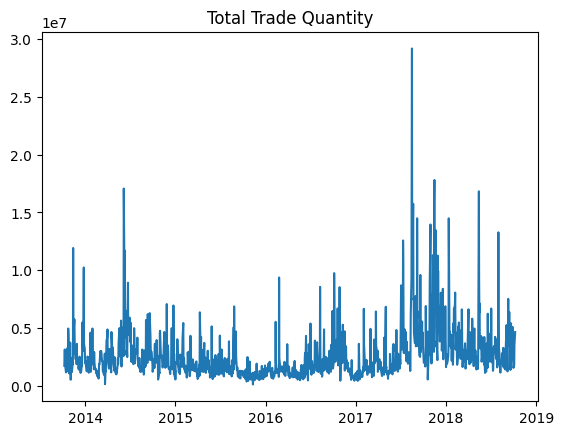

In [291]:
plt.plot(df['Date'],df['Total Trade Quantity'])
plt.title("Total Trade Quantity")


In [292]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06


In [293]:
df=df.iloc[:,[0,1,2,3,4,6,7,5]]
df.head()

,Date,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs),Close
1234,2013-10-08,157.00,157.80,155.20,155.8,1720413.0,2688.94,155.80
1233,2013-10-09,155.70,158.20,154.15,155.3,2049580.0,3204.49,155.55
1232,2013-10-10,156.00,160.80,155.85,160.3,3124853.0,4978.80,160.15
1231,2013-10-11,161.15,163.45,159.00,159.8,1880046.0,3030.76,160.05
1230,2013-10-14,160.85,161.45,157.70,159.3,1281419.0,2039.09,159.45


In [294]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [295]:
x[:,0]

array(['2013-10-08', '2013-10-09', '2013-10-10', ..., '2018-10-04',
       '2018-10-05', '2018-10-08'], dtype=object)

In [296]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
encoder=LabelEncoder()
x[:,0]=encoder.fit_transform(x[:,0])
x

array([[0, 157.0, 157.8, ..., 155.8, 1720413.0, 2688.94],
       [1, 155.7, 158.2, ..., 155.3, 2049580.0, 3204.49],
       [2, 156.0, 160.8, ..., 160.3, 3124853.0, 4978.8],
       ...,
       [1232, 223.5, 227.8, ..., 217.25, 1728786.0, 3815.79],
       [1233, 217.0, 218.6, ..., 210.25, 3519515.0, 7407.06],
       [1234, 208.0, 222.25, ..., 216.0, 4642146.0, 10062.83]],
      dtype=object)

In [297]:
y

array([155.8 , 155.55, 160.15, ..., 218.2 , 209.2 , 215.15])

In [298]:
scaler_1=StandardScaler()
y=scaler_1.fit_transform(y.reshape(-1, 1))

In [299]:
y

array([[-0.25097117],
       [-0.25582328],
       [-0.16654459],
       ...,
       [ 0.96011362],
       [ 0.78543793],
       [ 0.90091797]])

In [300]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((988, 7), (247, 7), (988, 1), (247, 1))

input is in 3d for RNN 

In [301]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [302]:
from tensorflow.keras.layers import *
model=tf.keras.Sequential()
model.add(SimpleRNN(units=50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])


In [303]:
history=model.fit(x=tf.convert_to_tensor(x_train,np.float32),y=tf.convert_to_tensor(y_train,np.float32),validation_data=[tf.convert_to_tensor(x_test,np.float32),tf.convert_to_tensor(y_test,np.float32)],batch_size=32,epochs=50)

Epoch 1/50


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.0000e+00 - loss: 7105696768.0000 - val_accuracy: 0.0000e+00 - val_loss: 62234172.0000
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 282586560.0000 - val_accuracy: 0.0000e+00 - val_loss: 53960504.0000
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 17957136.0000 - val_accuracy: 0.0000e+00 - val_loss: 4217359.0000
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 1725668.5000 - val_accuracy: 0.0000e+00 - val_loss: 439234.6562
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 440825.4062 - val_accuracy: 0.0000e+00 - val_loss: 299099.9375
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 194924.9219 - val_accuracy: 0.0000e+00 - val_loss: 229135.7500
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 207689.7031 - val_accuracy: 0.0000e+00 - val_los

In [304]:
model.evaluate(tf.convert_to_tensor(x_test,np.float32),tf.convert_to_tensor(y_test,np.float32))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 14959302.0000 


[13310857.0, 0.0]

In [305]:
model.save('rnn.keras')

In [306]:
def plot_curves(history):    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

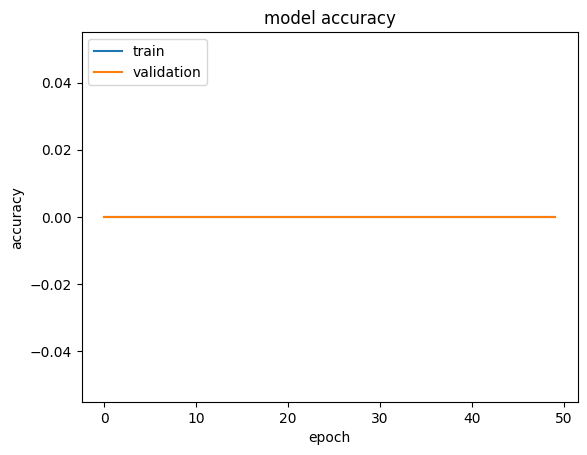

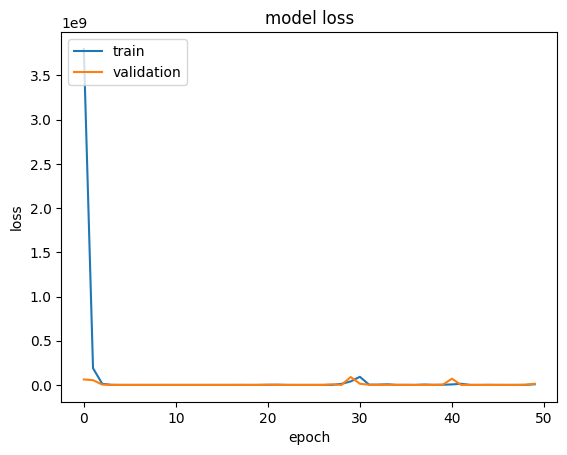

In [307]:
plot_curves(history)

In [308]:
x_test[0]

array([[1083],
       [273.55],
       [274.8],
       [271.55],
       [274.8],
       [3672359.0],
       [10027.43]], dtype=object)

In [309]:
x_train.shape

(988, 7, 1)

In [310]:
predictions=model.predict(tf.convert_to_tensor(x_test,np.float32))
predictions

1/8 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[ 3184.75   ],
       [  531.1855 ],
       [ 1300.4296 ],
       [ 1414.0702 ],
       [ 4592.742  ],
       [ 4258.     ],
       [ 3398.3516 ],
       [ 1474.3436 ],
       [ 6557.117  ],
       [10725.539  ],
       [ 5800.8984 ],
       [ 1855.6405 ],
       [ 2540.5156 ],
       [ 4365.1953 ],
       [ 1247.8827 ],
       [ 2959.4453 ],
       [ 1318.3866 ],
       [ 5466.3984 ],
       [ 1526.8905 ],
       [ 6856.4766 ],
       [ 2316.7656 ],
       [  788.1015 ],
       [ 3044.1328 ],
       [ 3899.0234 ],
       [  585.7968 ],
       [  515.8925 ],
       [ 1487.078  ],
       [ 1176.4003 ],
       [ 1734.0468 ],
       [  814.4843 ],
       [ 1070.2694 ],
       [14900.852  ],
       [ 2113.9531 ],
       [ 3980.164  ],
       [ 3741.3516 ],
       [ 1896.3632 ],
       [ 1153.7303 ],
       [ 3370.2266 ],
       [ 9785.477  ],
       [  936.82025],
       [ 1972.039  ],
       [ 1565.5819 ],
       [ 3432.7578 ],
       [ 2708.9062 ],
       [ 2124.0273 ],
       [ 1

In [311]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_squared_error(y_test,predictions)
mae

13310856.826442193

In [312]:
mse=mean_absolute_error(predictions,y_test)
mse

2836.431372310246

In [313]:
x_test[0].shape

(7, 1)

In [314]:
input=np.array([['2018-10-08',208.00,222.25,206.85,215.15,4642146.0,10062.83]])
# input.reshape(len(input),1)
input=input.T
n=np.array([input[0][0]])
t=encoder.transform(n)
input[0][0]=t[0]

In [315]:
input[0,0].dtype

dtype('<U4')

In [316]:
x_test[0]

array([[1083],
       [273.55],
       [274.8],
       [271.55],
       [274.8],
       [3672359.0],
       [10027.43]], dtype=object)

In [317]:
input

array([['1234'],
       ['208.0'],
       ['222.25'],
       ['206.85'],
       ['215.15'],
       ['4642146.0'],
       ['10062.83']], dtype='<U32')

In [318]:
input=input.astype(np.float32)


In [319]:
input

array([[1.234000e+03],
       [2.080000e+02],
       [2.222500e+02],
       [2.068500e+02],
       [2.151500e+02],
       [4.642146e+06],
       [1.006283e+04]], dtype=float32)

In [320]:
x_test[0].shape

(7, 1)

In [321]:
x_test.shape

(247, 7, 1)

In [322]:
z=tf.convert_to_tensor([x_test[0]])
z.shape

TensorShape([1, 7, 1])

In [323]:
z

<tf.Tensor: shape=(1, 7, 1), dtype=float32, numpy=
array([[[1.083000e+03],
        [2.735500e+02],
        [2.748000e+02],
        [2.715500e+02],
        [2.748000e+02],
        [3.672359e+06],
        [1.002743e+04]]], dtype=float32)>

In [324]:
m=tf.convert_to_tensor([input])
m.shape

TensorShape([1, 7, 1])

In [325]:
m

<tf.Tensor: shape=(1, 7, 1), dtype=float32, numpy=
array([[[1.234000e+03],
        [2.080000e+02],
        [2.222500e+02],
        [2.068500e+02],
        [2.151500e+02],
        [4.642146e+06],
        [1.006283e+04]]], dtype=float32)>

In [326]:
pred2=model.predict(m)
pred2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([[4565.2734]], dtype=float32)

In [327]:
scaler_1.inverse_transform(pred2)

array([[235390.14]], dtype=float32)

In [328]:
pred1=model.predict(z)
pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[3184.7734]], dtype=float32)

In [329]:
scaler_1.inverse_transform(pred1)

array([[164261.17]], dtype=float32)

In [332]:
scaler_1.inverse_transform([[-0.25097117]])

array([[155.80000022]])

In [334]:
y_test[0]

array([2.03339871])

In [337]:
scaler_1.inverse_transform([y_test[0]])

array([[273.5]])